# Artificial Neural Network(ANN): Classification

#### Artificial Neural Network(ANN) can be used to train Classification and Regression. An ANN is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain. Each connection, like the synapses in a biological brain, can transmit a signal to other neurons. An artificial neuron receives signals then processes them and can signal neurons connected to it. The "signal" at a connection is a real number, and the output of each neuron is computed by some non-linear function of the sum of its inputs. The connections are called edges. Neurons and edges typically have a weight that adjusts as learning proceeds. The weight increases or decreases the strength of the signal at a connection. Neurons may have a threshold such that a signal is sent only if the aggregate signal crosses that threshold. Typically, neurons are aggregated into layers. Different layers may perform different transformations on their inputs. Signals travel from the first layer (the input layer), to the last layer (the output layer), possibly after traversing the layers multiple times. 

### Layers of Neurons interconnected to each other to predict the output layer

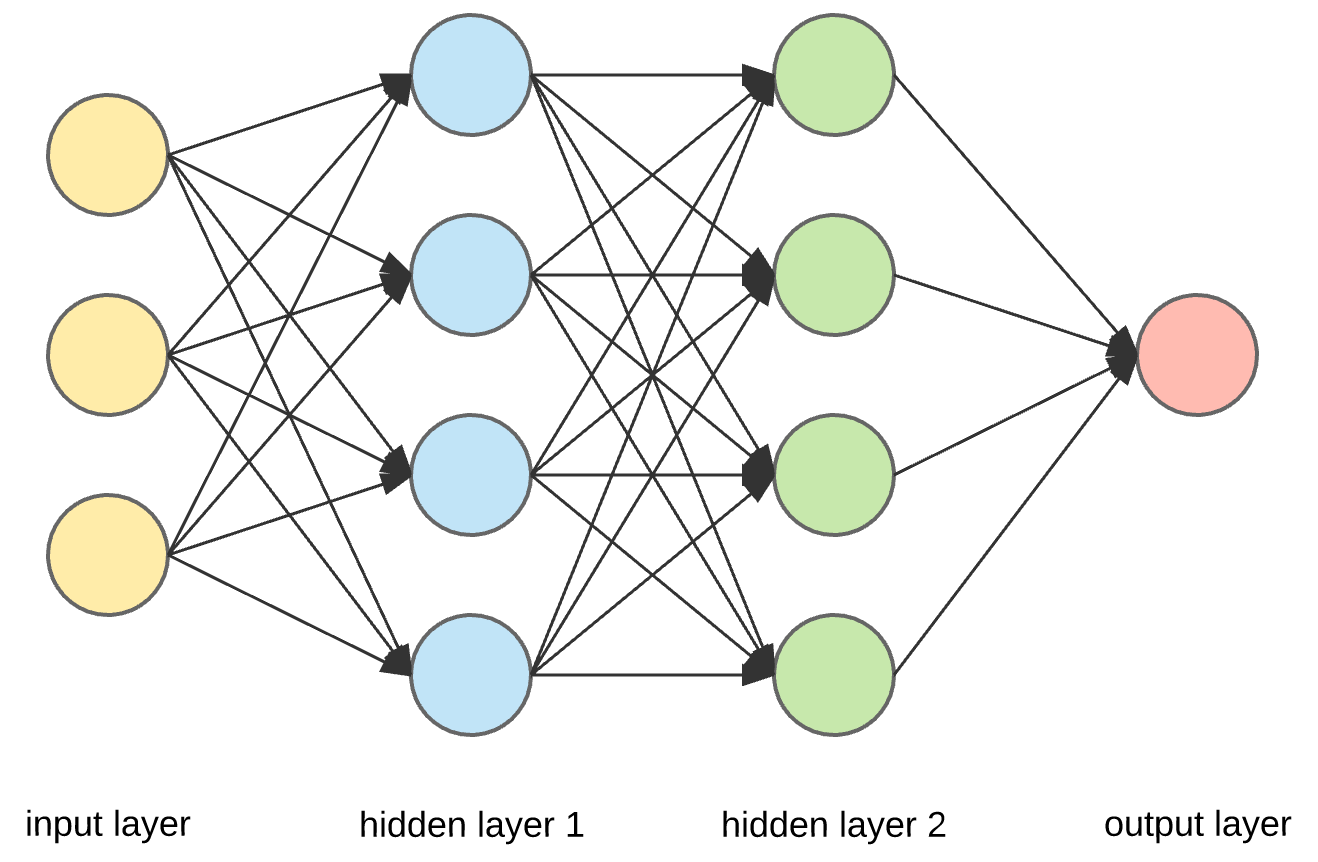

## Problem Analysis

#### This breast cancer dataset is from  UCI machine learning repository and was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg. 

   ###  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
   10. Mitoses                       1 - 10
   11. Class:                        (2 for benign, 4 for malignant)
  
#### In this dataset we have 683 rows and 11 columns. We have 10 independent features and one dependent, we try to predict if the tumor is benign or malignant, it is benign(class 2) and malignant(class 4). In the other Notebook, we used XGBoost Algorithm and different classification Model of Machine Learning to predict the tumor. We now use ANN Classification to see how it perform on this paritcular breast cancer dataset and compare it with the Machine Learning prediction.


# Artificial Neural Network

## Part 1 - Data Preprocessing
#### Take about 70% work of a DataScientist

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

## Importing the dataset

In [2]:
dataset_BC = pd.read_csv('breast-cancer.csv')

In [3]:
dataset_BC

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


#### In this dataset we have 683 rows and 11 columns. We have 10 independent features and one dependent  we are trying to predict if the tumor is benign or malignant. And with all these features, we were trying to predict if the tumor is benign or malignant, it is benign(class 2) and malignant if (class 4). We build and trained our classification model, the 10 1st feature learn the correlations between all these features and that dependent feature class variable telling if the tumor is benign or malignant.

In [4]:
dataset_BC.isna().sum()

Sample code number             0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [5]:
dataset_BC.columns

Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [6]:
dataset_BC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [7]:
dataset_BC.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [8]:
dataset_BC.dtypes

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [9]:
dataset_BC['Class'] = dataset_BC['Class'].astype(str)

In [10]:
dataset_BC['Class'] = dataset_BC['Class'].str.replace('2', '0').str.replace('4', '1')
dataset_BC['Class']

0      0
1      0
2      0
3      0
4      0
      ..
678    0
679    0
680    1
681    1
682    1
Name: Class, Length: 683, dtype: object

In [11]:
dataset_BC['Class'] = dataset_BC['Class'].astype(int)

In [12]:
dataset_BC.dtypes

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int32
dtype: object

In [13]:
#Check the datatype object unique number of values
categorical = dataset_BC.select_dtypes(include='int64')
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

Sample code number
630
Clump Thickness
10
Uniformity of Cell Size
10
Uniformity of Cell Shape
10
Marginal Adhesion
10
Single Epithelial Cell Size
10
Bare Nuclei
10
Bland Chromatin
10
Normal Nucleoli
10
Mitoses
9


In [14]:
dataset_BC['Class'].unique()

array([0, 1])

In [15]:
#Check classification label division
dataset_BC['Class'].value_counts()

0    444
1    239
Name: Class, dtype: int64

In [16]:
#Drop unimportant column
dataset_BC.drop(['Sample code number'], 1, inplace=True)


In [17]:
dataset_BC.shape

(683, 10)

## Splitting the dataset into the Training set and Test set

In [18]:
X = dataset_BC.iloc[:, :-1].values
y = dataset_BC.iloc[:, -1].values

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Building the ANN(Brain)

### Initializing the ANN

In [21]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer
#### After experimenting, the number neurons(units=8).


In [22]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'  ))

### Adding the second hidden layer

In [23]:
ann.add(tf.keras.layers.Dense(units=10, activation='relu'  ))

### Adding the output layer

In [24]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'  )) 

## Part 3 - Training the ANN(Brain will learn)

In [25]:
ann.compile(optimizer='adam', loss ='binary_crossentropy', metrics = ['accuracy'] )

In [26]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)


Train on 546 samples
Epoch 1/100
546/546 [==============================] - 0s 787us/sample - loss: 0.5915 - accuracy: 0.7253
Epoch 2/100
546/546 [==============================] - 0s 49us/sample - loss: 0.5415 - accuracy: 0.7271
Epoch 3/100
546/546 [==============================] - 0s 57us/sample - loss: 0.4940 - accuracy: 0.7509
Epoch 4/100
546/546 [==============================] - 0s 62us/sample - loss: 0.4466 - accuracy: 0.7949
Epoch 5/100
546/546 [==============================] - 0s 51us/sample - loss: 0.3971 - accuracy: 0.8498
Epoch 6/100
546/546 [==============================] - 0s 55us/sample - loss: 0.3471 - accuracy: 0.8938
Epoch 7/100
546/546 [==============================] - 0s 46us/sample - loss: 0.2995 - accuracy: 0.9231
Epoch 8/100
546/546 [==============================] - 0s 67us/sample - loss: 0.2561 - accuracy: 0.9505
Epoch 9/100
546/546 [==============================] - 0s 62us/sample - loss: 0.2183 - accuracy: 0.9542
Epoch 10/100
546/546 [====================

#### We can see that the accuracy start to converge at epoch 55, so actually 60 epoch is enough.

### Predicting the Test set results

In [27]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]]


### Making the Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print("CONFUSION MATRIX: \n", cm)
print()
print("ACCURACY: {:.2f} %".format(accuracy_score(y_test, y_pred)*100))
print("PRECISION: {:.2f} %".format(precision_score(y_test, y_pred)*100))
print("RECALL: {:.2f} %".format(recall_score(y_test, y_pred)*100))
print("F1-SCORE: {:.2f} %".format(f1_score(y_test, y_pred)*100))

CONFUSION MATRIX: 
 [[84  3]
 [ 0 50]]

ACCURACY: 97.81 %
PRECISION: 94.34 %
RECALL: 100.00 %
F1-SCORE: 97.09 %


8 & 8

CONFUSION MATRIX: 
 [[83  4]
 [ 2 48]]

ACCURACY: 95.62 %
PRECISION: 92.31 %
RECALL: 96.00 %
F1-SCORE: 94.12 %

6&6
CONFUSION MATRIX: 
 [[84  3]
 [ 1 49]]

ACCURACY: 97.08 %
PRECISION: 94.23 %
RECALL: 98.00 %
F1-SCORE: 96.08 %

8&6
CONFUSION MATRIX: 
 [[83  4]
 [ 2 48]]

ACCURACY: 95.62 %
PRECISION: 92.31 %
RECALL: 96.00 %
F1-SCORE: 94.12 %

6&8
CONFUSION MATRIX: 
 [[84  3]
 [ 0 50]]

ACCURACY: 97.81 %
PRECISION: 94.34 %
RECALL: 100.00 %
F1-SCORE: 97.09 %

10&10
CONFUSION MATRIX: 
 [[84  3]
 [ 0 50]]

ACCURACY: 97.81 %
PRECISION: 94.34 %
RECALL: 100.00 %
F1-SCORE: 97.09 %

## Conclusion:

#### After experimenting with the number units(neurons) in the hidden layer, the best hidden layer is 6 neurons 1st hidden layer and 10 neurons in the 2nd hidden layer. The ACCURACY: 97.81 % PRECISION: 94.34 % RECALL: 100.00 % F1-SCORE: 97.09 %. ANN is the best model, which perform well with an accuracy of 97.81% better than XGBoost with avg crossval accuracy of 97.44%. Both model perform well but ANN has higher Precision and Recall.This model has less FP(predicted as Benign but actually malignant) which is more important than FN(predicted as malignant but actually benigh) in medical diagnosing. If we tell someone they don't have breast cancer when they actually do then they can go untreated as the cancer progresses, whereas telling someone they have cancer but actually they don't, more medical tests will be administered to confirm the diagnosis.